This notebook shows how to generate a synthetic District Heating Network (DHN) using the developed models.

A graph generator generates a random graph mimicking DHN topology and a heating model generates demands for the substation nodes.

#### Loading python packages

In [1]:
# Packages

import os
import networkx as nx
import sys
import os
from src.graph_generator import GraphDHNGenerator
from src.graph_generator_params import GraphGeneratorParameters
from src.dhn_topology import DHNTopology
from src.demands_model_dpe import generate_substation_demands

import matplotlib.pyplot as plt
import matplotlib as mpt
from cycler import cycler

mpt.rcParams['lines.linewidth'] = 1.4
mpt.rcParams['font.size'] = 12
mpt.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.style.use('ggplot')


#### Synthetic DHN generator

We define control parameters including the number of connected regions, number of degree max per node, the number of nodes per regions, and the *target ratio* between number of edges and number of nodes. 
Other control parameters may be defined. For more detail, the reader is encouraged to take a look at the class **GraphGeneratorParameters**.


The target ratio has been introduced to influence the *presence of loops* inside the DHN. From expertise point of view, DHNs have low mean nodes degree and have few or none loops.

In [2]:
params = GraphGeneratorParameters(target_ratio=1.01, nb_regions=3, nb_nodes_per_region=40, E_rp=0.5, E_ee=0.1, edge_weight_mean=1.0, edge_weight_std=0.1, nb_producers_to_reach=3)

Then, we create a random graph generator object (**GraphDHNGenerator**) which uses the control parameters as properties.

In [3]:
generator = GraphDHNGenerator(params)

Now, we have everything to generate a random DHN. To do so, we call a function of the class **GraphDHNGenerator**.

Generating each region ...
	Region 1
	Region 2
	Region 3
Loop --> adding edges between regions
	 --> finished
cycle found [(51, 53), (53, 78), (78, 51)]
cycle found [(81, 82), (82, 94), (94, 81)]
cycle found [(94, 81), (81, 82), (82, 94)]
Found cycles = [[(51, 53), (53, 78), (78, 51)], [(81, 82), (82, 94), (94, 81)], [(94, 81), (81, 82), (82, 94)]]
Treating the cycle [(51, 53), (53, 78), (78, 51)]
Edge (51,53) removed
Treating the cycle [(81, 82), (82, 94), (94, 81)]
Edge (81,82) removed
Treating the cycle [(94, 81), (81, 82), (82, 94)]
DHN-based graph generated !


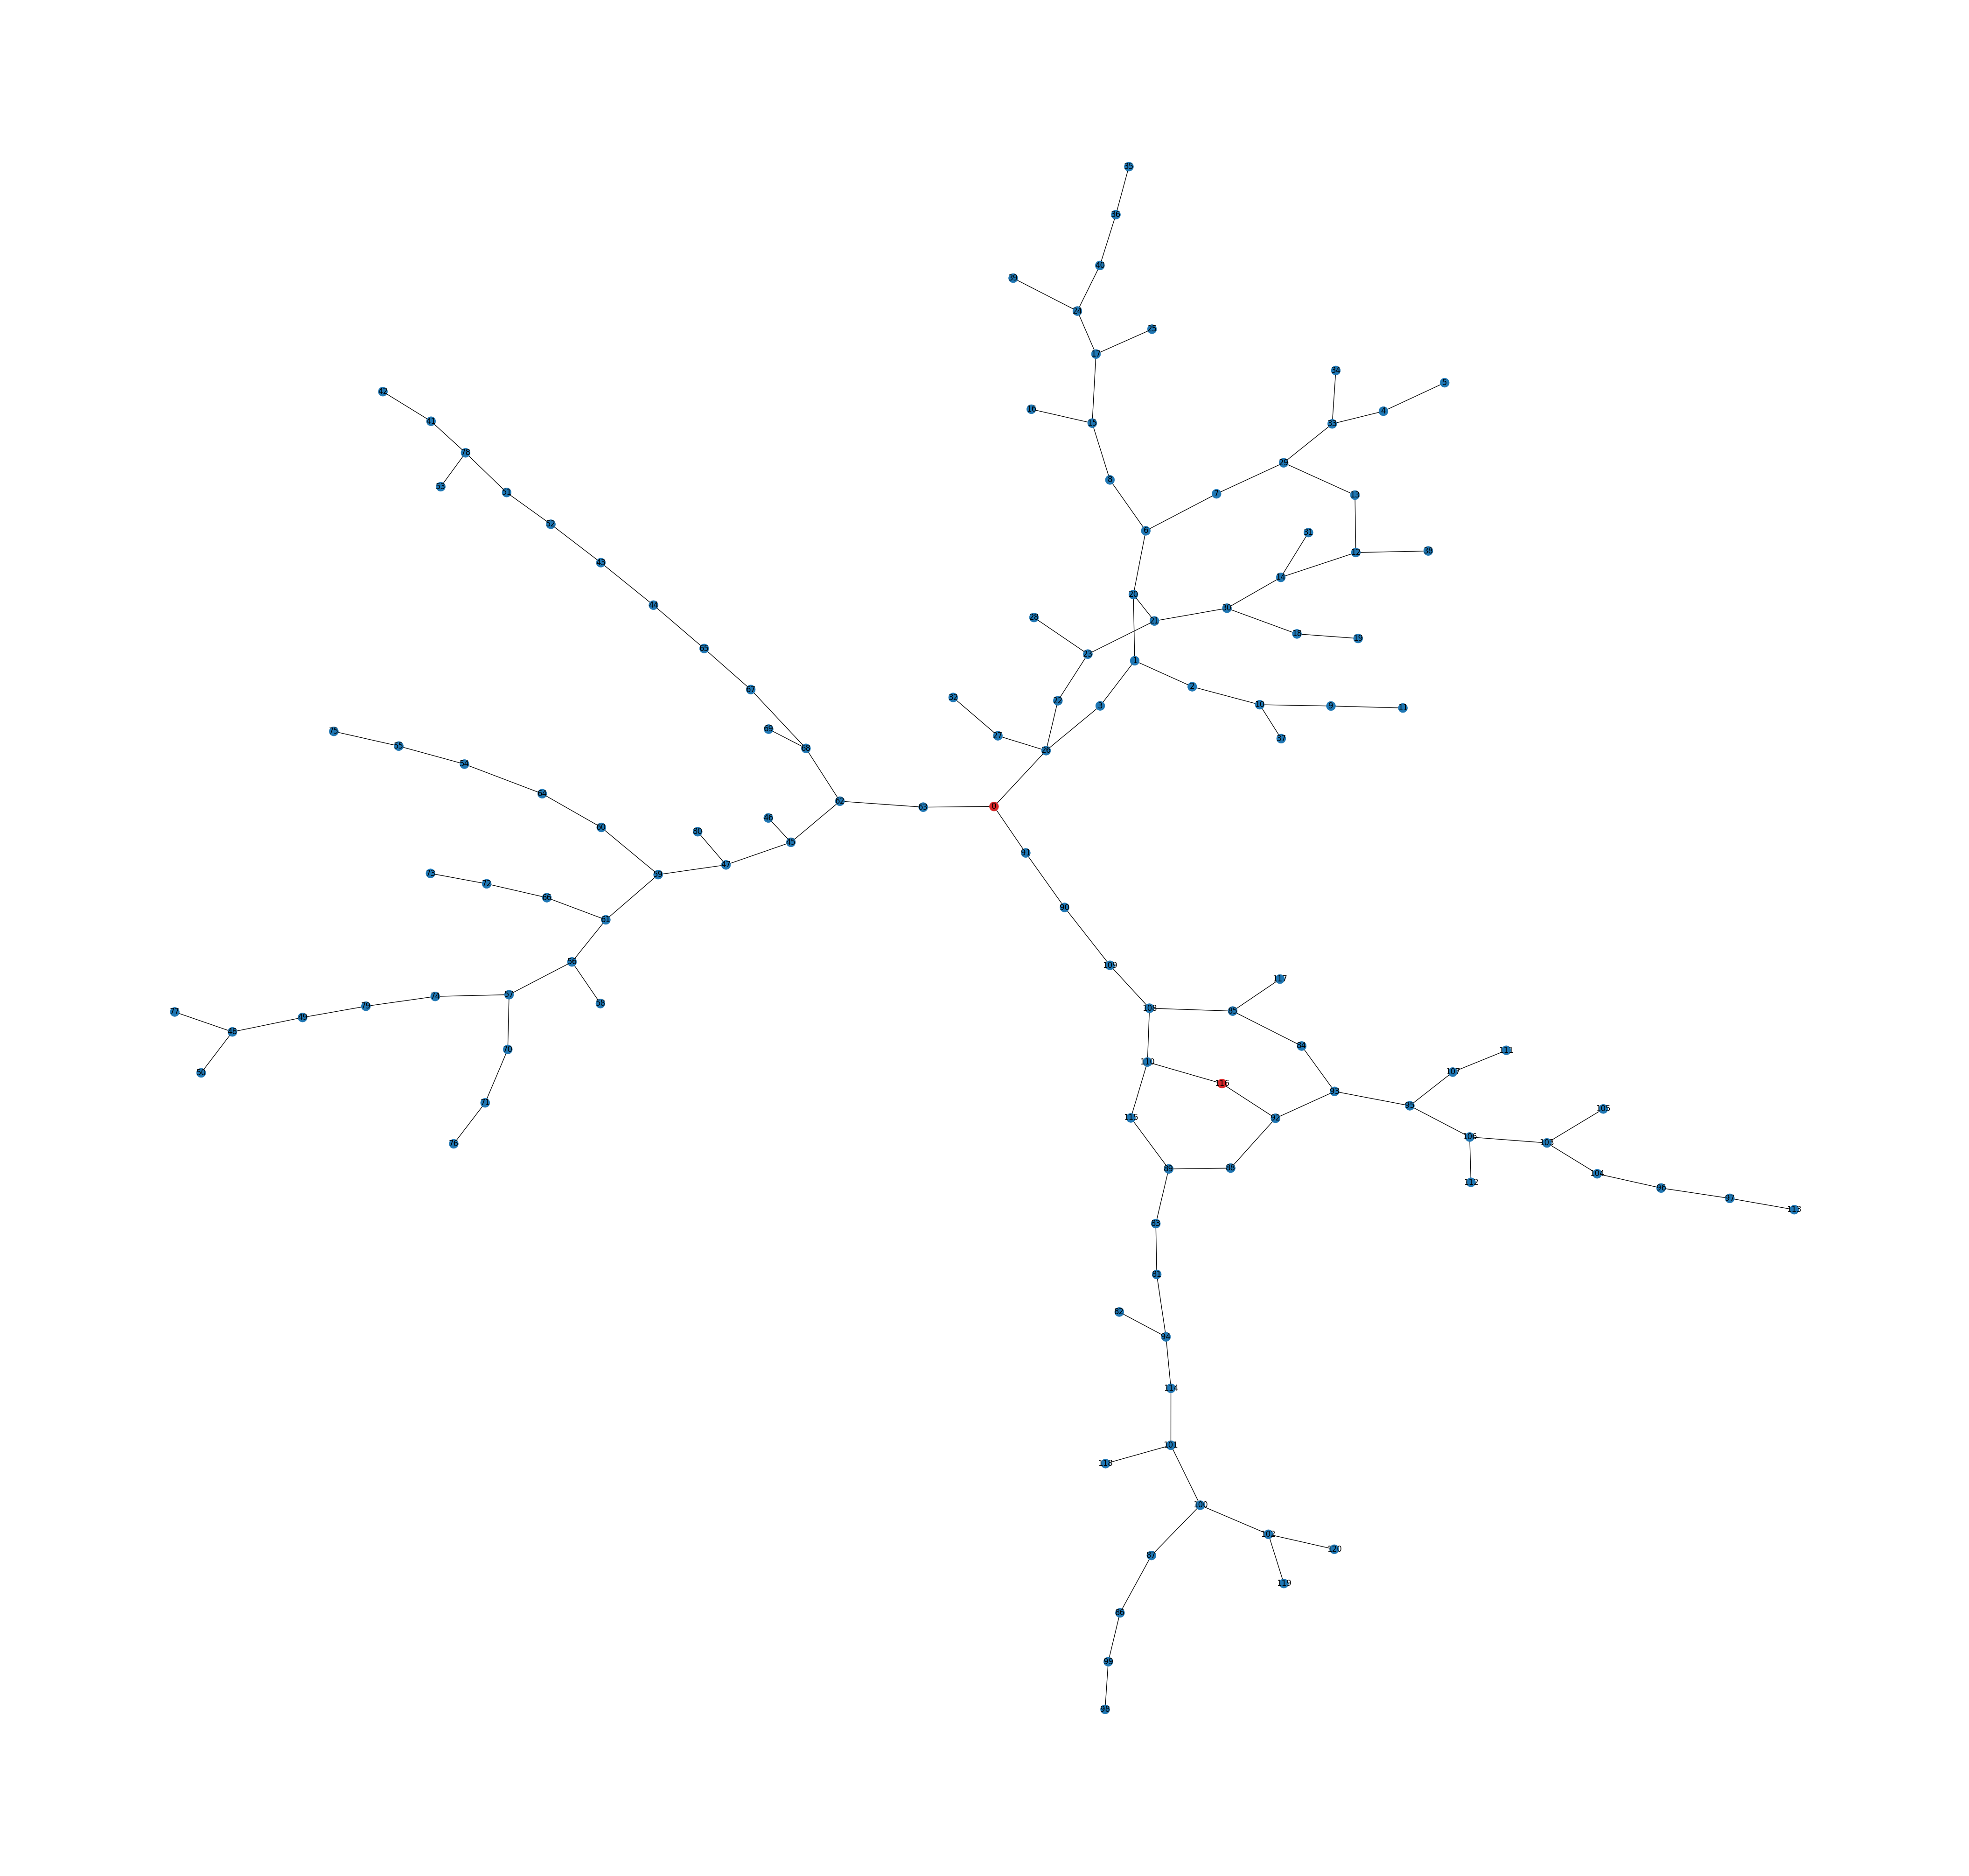

Producers are = [0, 104, 10, 60]
Number of nodes are = 121


In [4]:
generator.generate_random_connected_dhn()

# We shown the number of producers and the number of nodes of the DHN generated.
print(f'Producers are = {generator.producer_indices}')
print(f'Number of nodes are = {len(generator.node_positions)}')

#### DHN topology file

From the generated DHN, we generate a topology file in excel format containing the information of the substation nodes, the pipes and the heating demands of the nodes.

The following cell may take few minutes. 

In [5]:
topology_dhn = DHNTopology(generator, 
                           graph_folder_name = 'DHN1',
                           heating_demand_model=2) # If 1 use heating law, 2 use DPE French data

### Generating 100 synthetic DHNs

Here, we generate 100 synthetic DHNs. Note that this code may take several minutes. 

Generating each region ...
	Region 1
	Region 2
	Region 3
Loop --> adding edges between regions
	 --> finished
cycle found [(38, 22), (22, 23), (23, 38)]
cycle found [(52, 53), (53, 90), (90, 52)]
cycle found [(53, 52), (52, 90), (90, 53)]
cycle found [(90, 52), (52, 53), (53, 90)]
Found cycles = [[(38, 22), (22, 23), (23, 38)], [(52, 53), (53, 90), (90, 52)], [(53, 52), (52, 90), (90, 53)], [(90, 52), (52, 53), (53, 90)]]
Treating the cycle [(38, 22), (22, 23), (23, 38)]
Edge (38,22) removed
Treating the cycle [(52, 53), (53, 90), (90, 52)]
Edge (52,53) removed
Treating the cycle [(53, 52), (52, 90), (90, 53)]
Edge (52,90) removed
Treating the cycle [(90, 52), (52, 53), (53, 90)]
DHN-based graph generated !


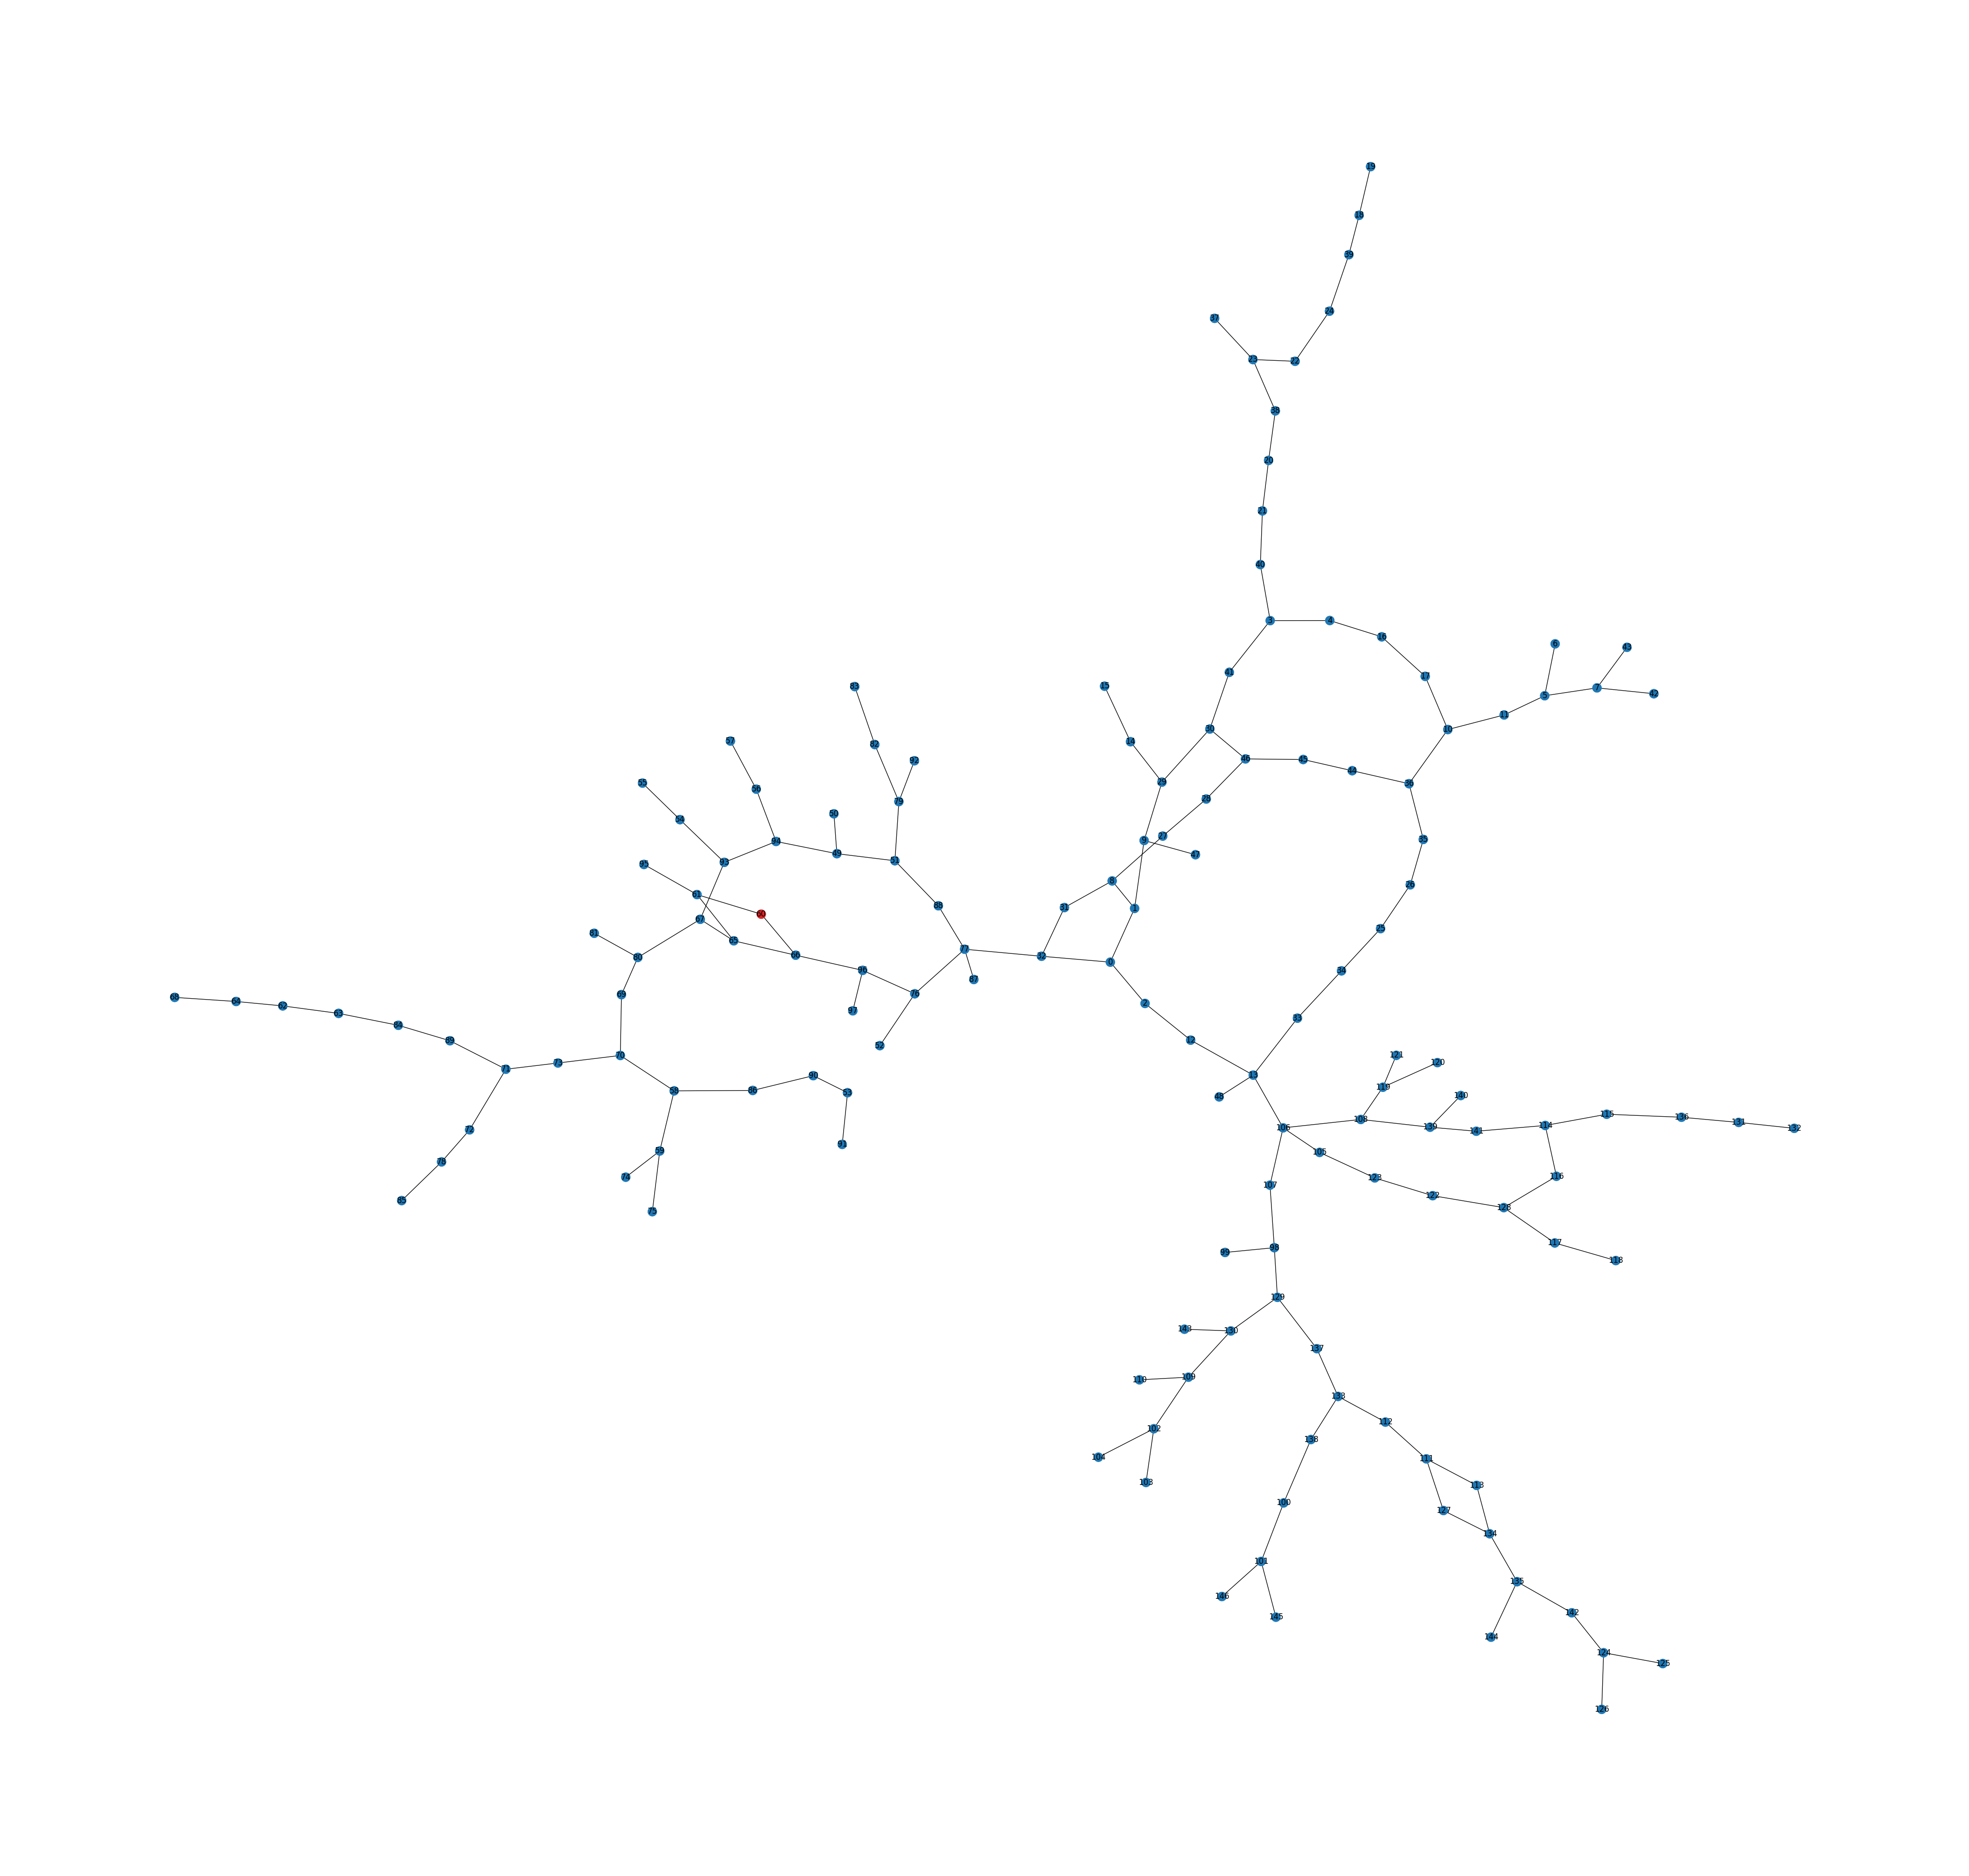

Generating each region ...
	Region 1
	Region 2
	Region 3
Loop --> adding edges between regions
	 --> finished
Found cycles = []
DHN-based graph generated !


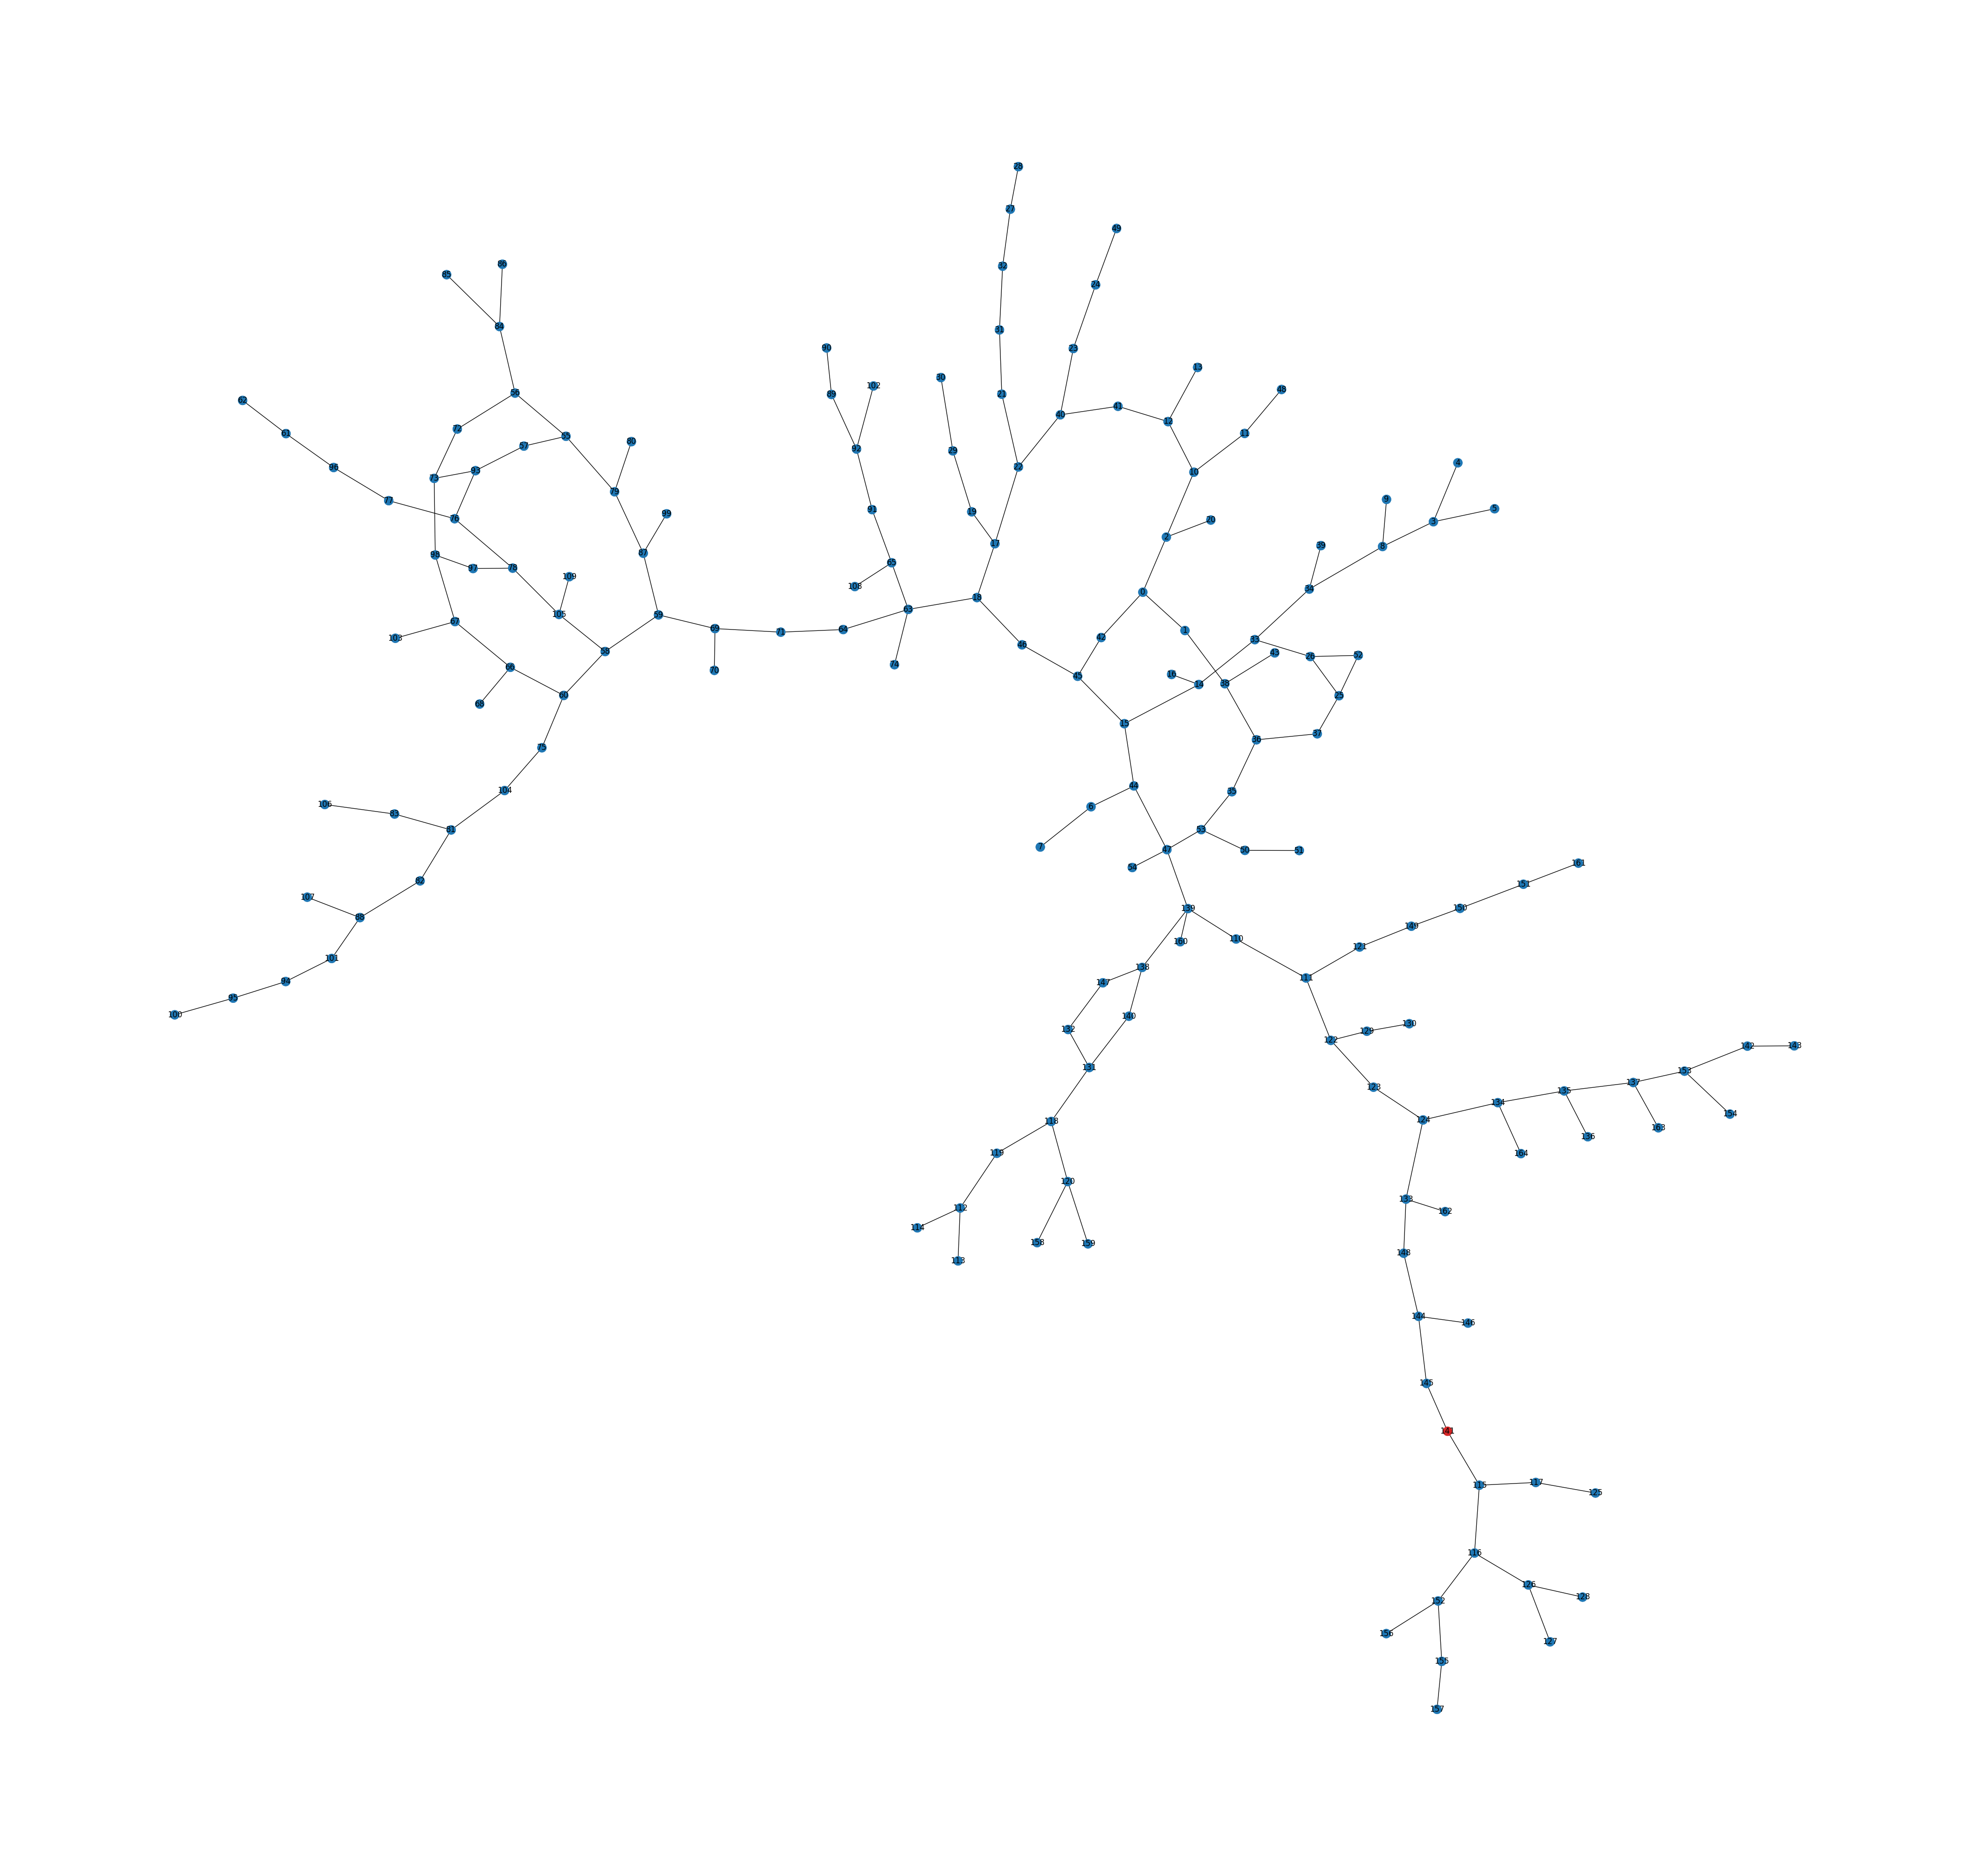

Generating each region ...
	Region 1
	Region 2
	Region 3
	Region 4
Loop --> adding edges between regions
	 --> finished
cycle found [(88, 86), (86, 107), (107, 88)]
Found cycles = [[(88, 86), (86, 107), (107, 88)]]
Treating the cycle [(88, 86), (86, 107), (107, 88)]
Edge (88,86) removed
DHN-based graph generated !


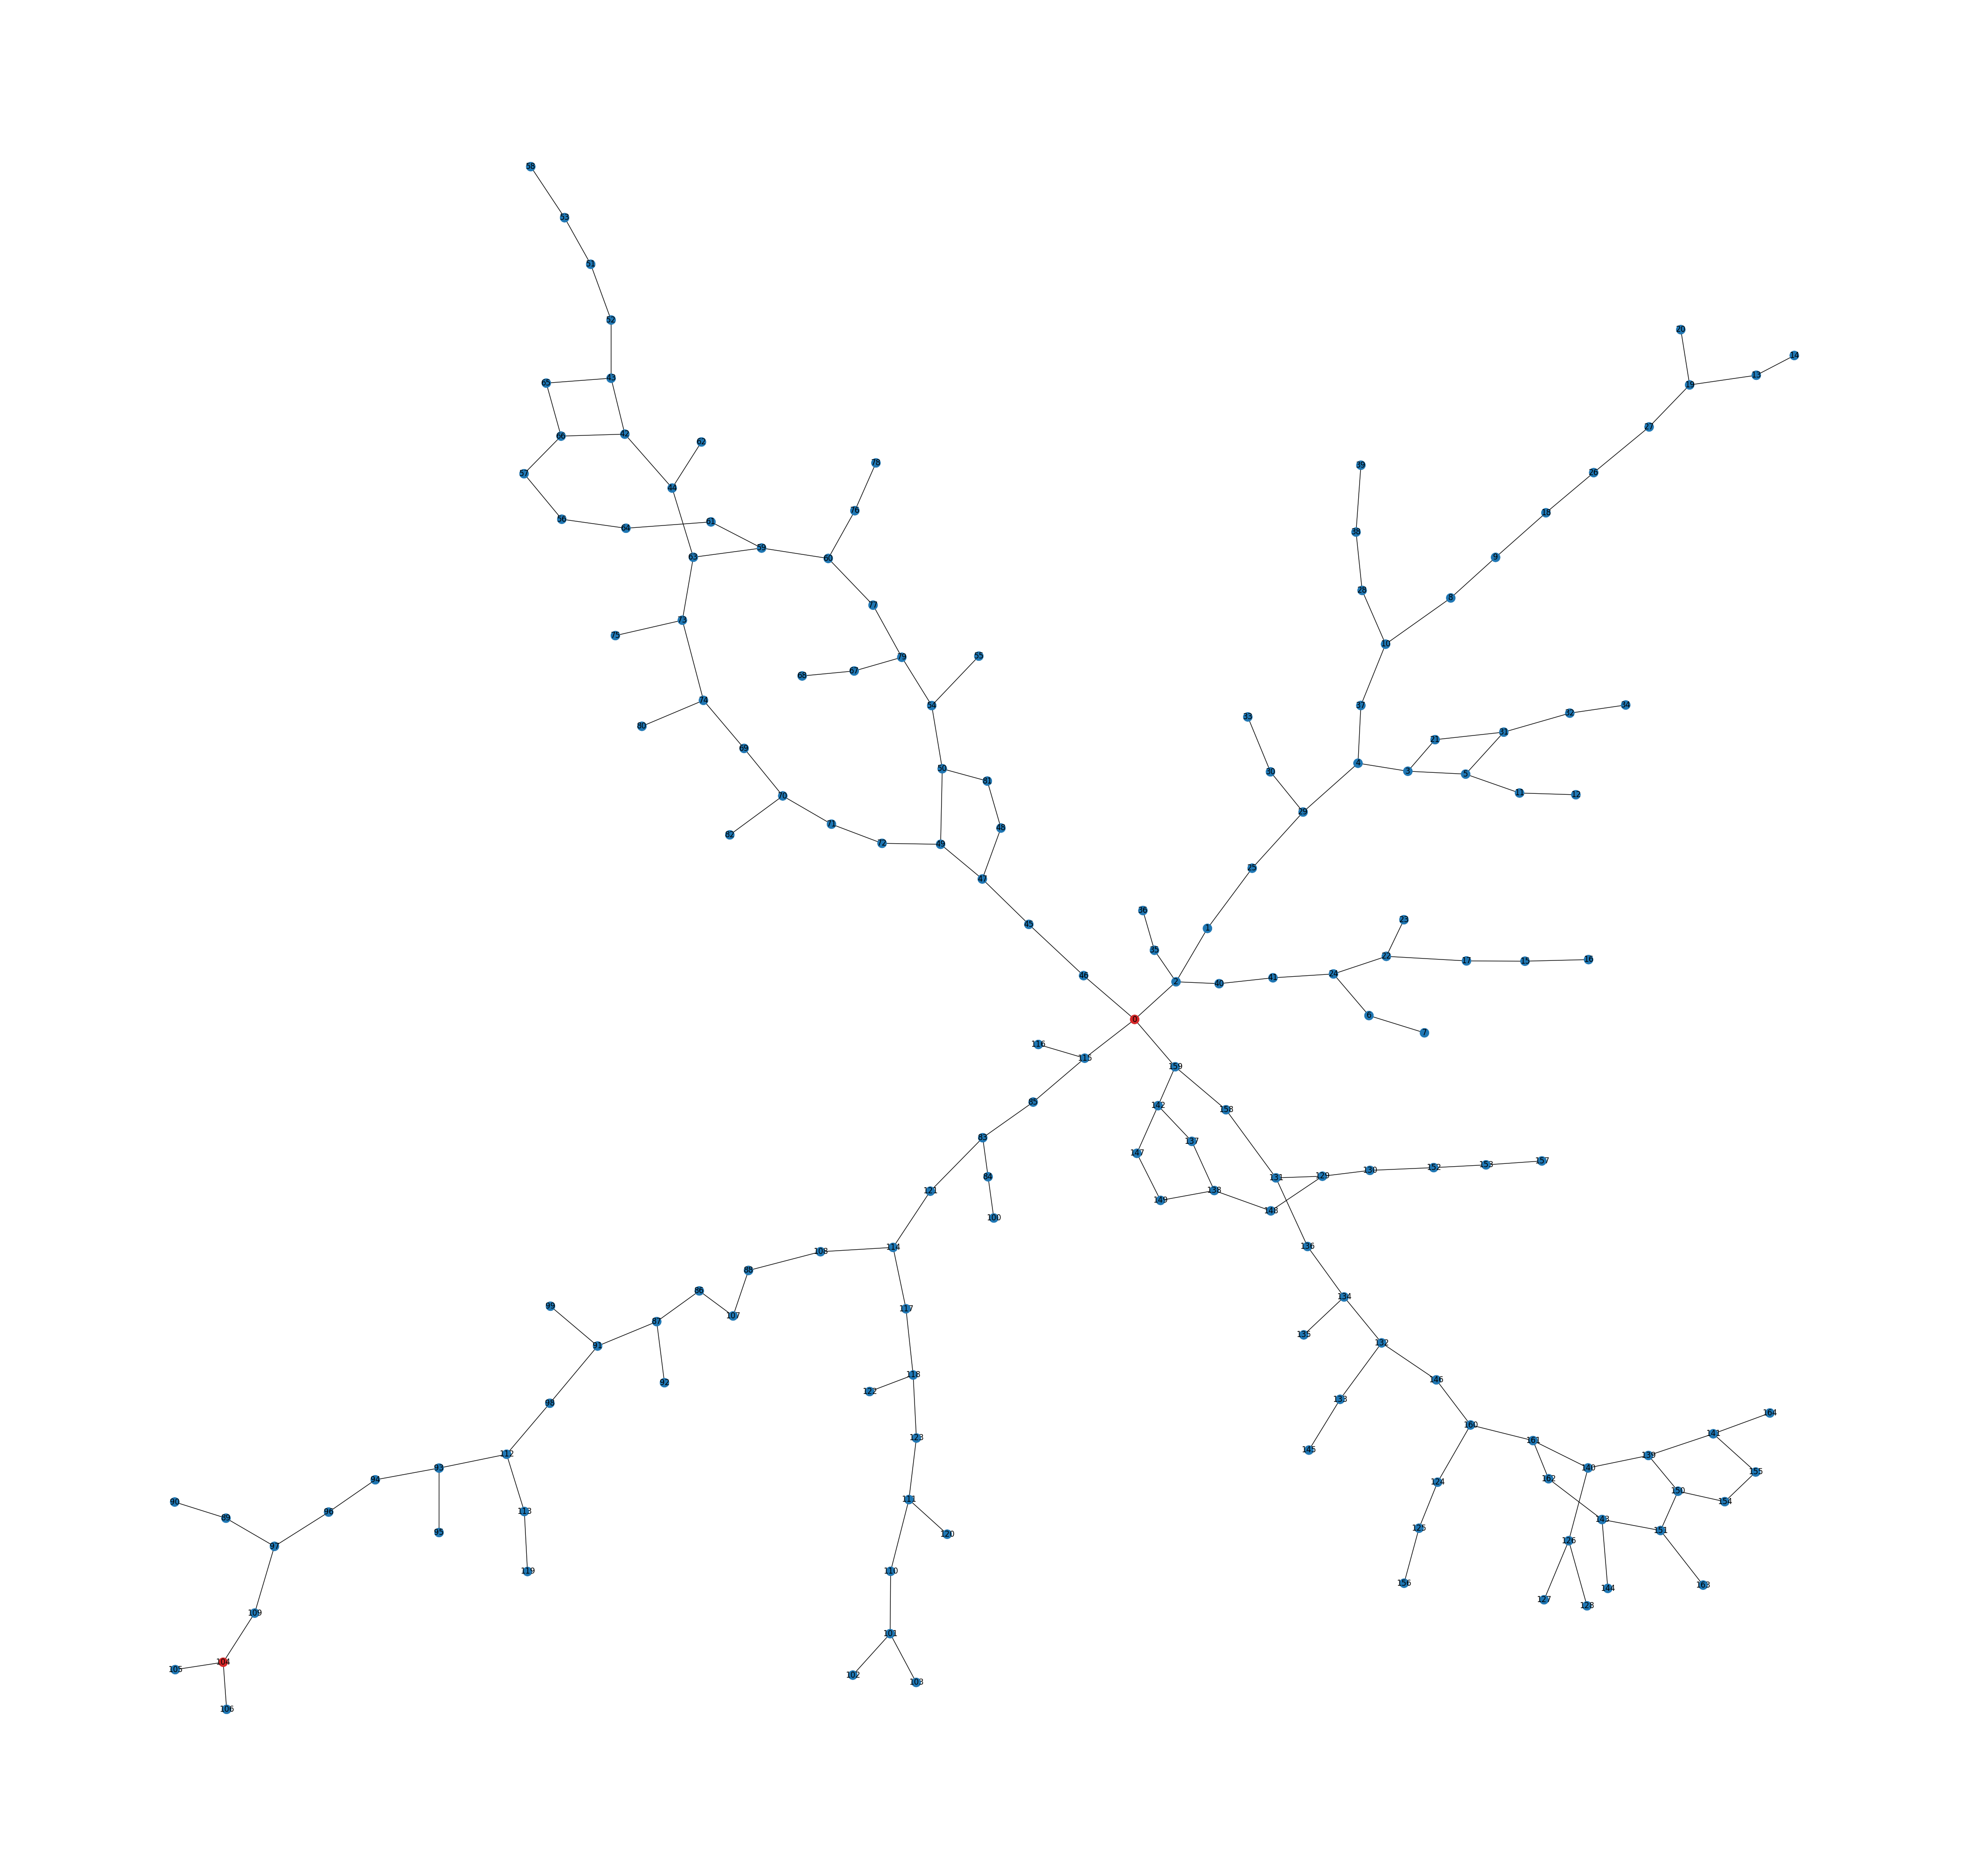

Generating each region ...
	Region 1
	Region 2
	Region 3
	Region 4
	Region 5
Loop --> adding edges between regions
	 --> finished
cycle found [(162, 160), (160, 167), (167, 162)]
cycle found [(200, 202), (202, 224), (224, 200)]
Found cycles = [[(162, 160), (160, 167), (167, 162)], [(200, 202), (202, 224), (224, 200)]]
Treating the cycle [(162, 160), (160, 167), (167, 162)]
Edge (162,160) removed
Treating the cycle [(200, 202), (202, 224), (224, 200)]
Edge (200,202) removed
DHN-based graph generated !


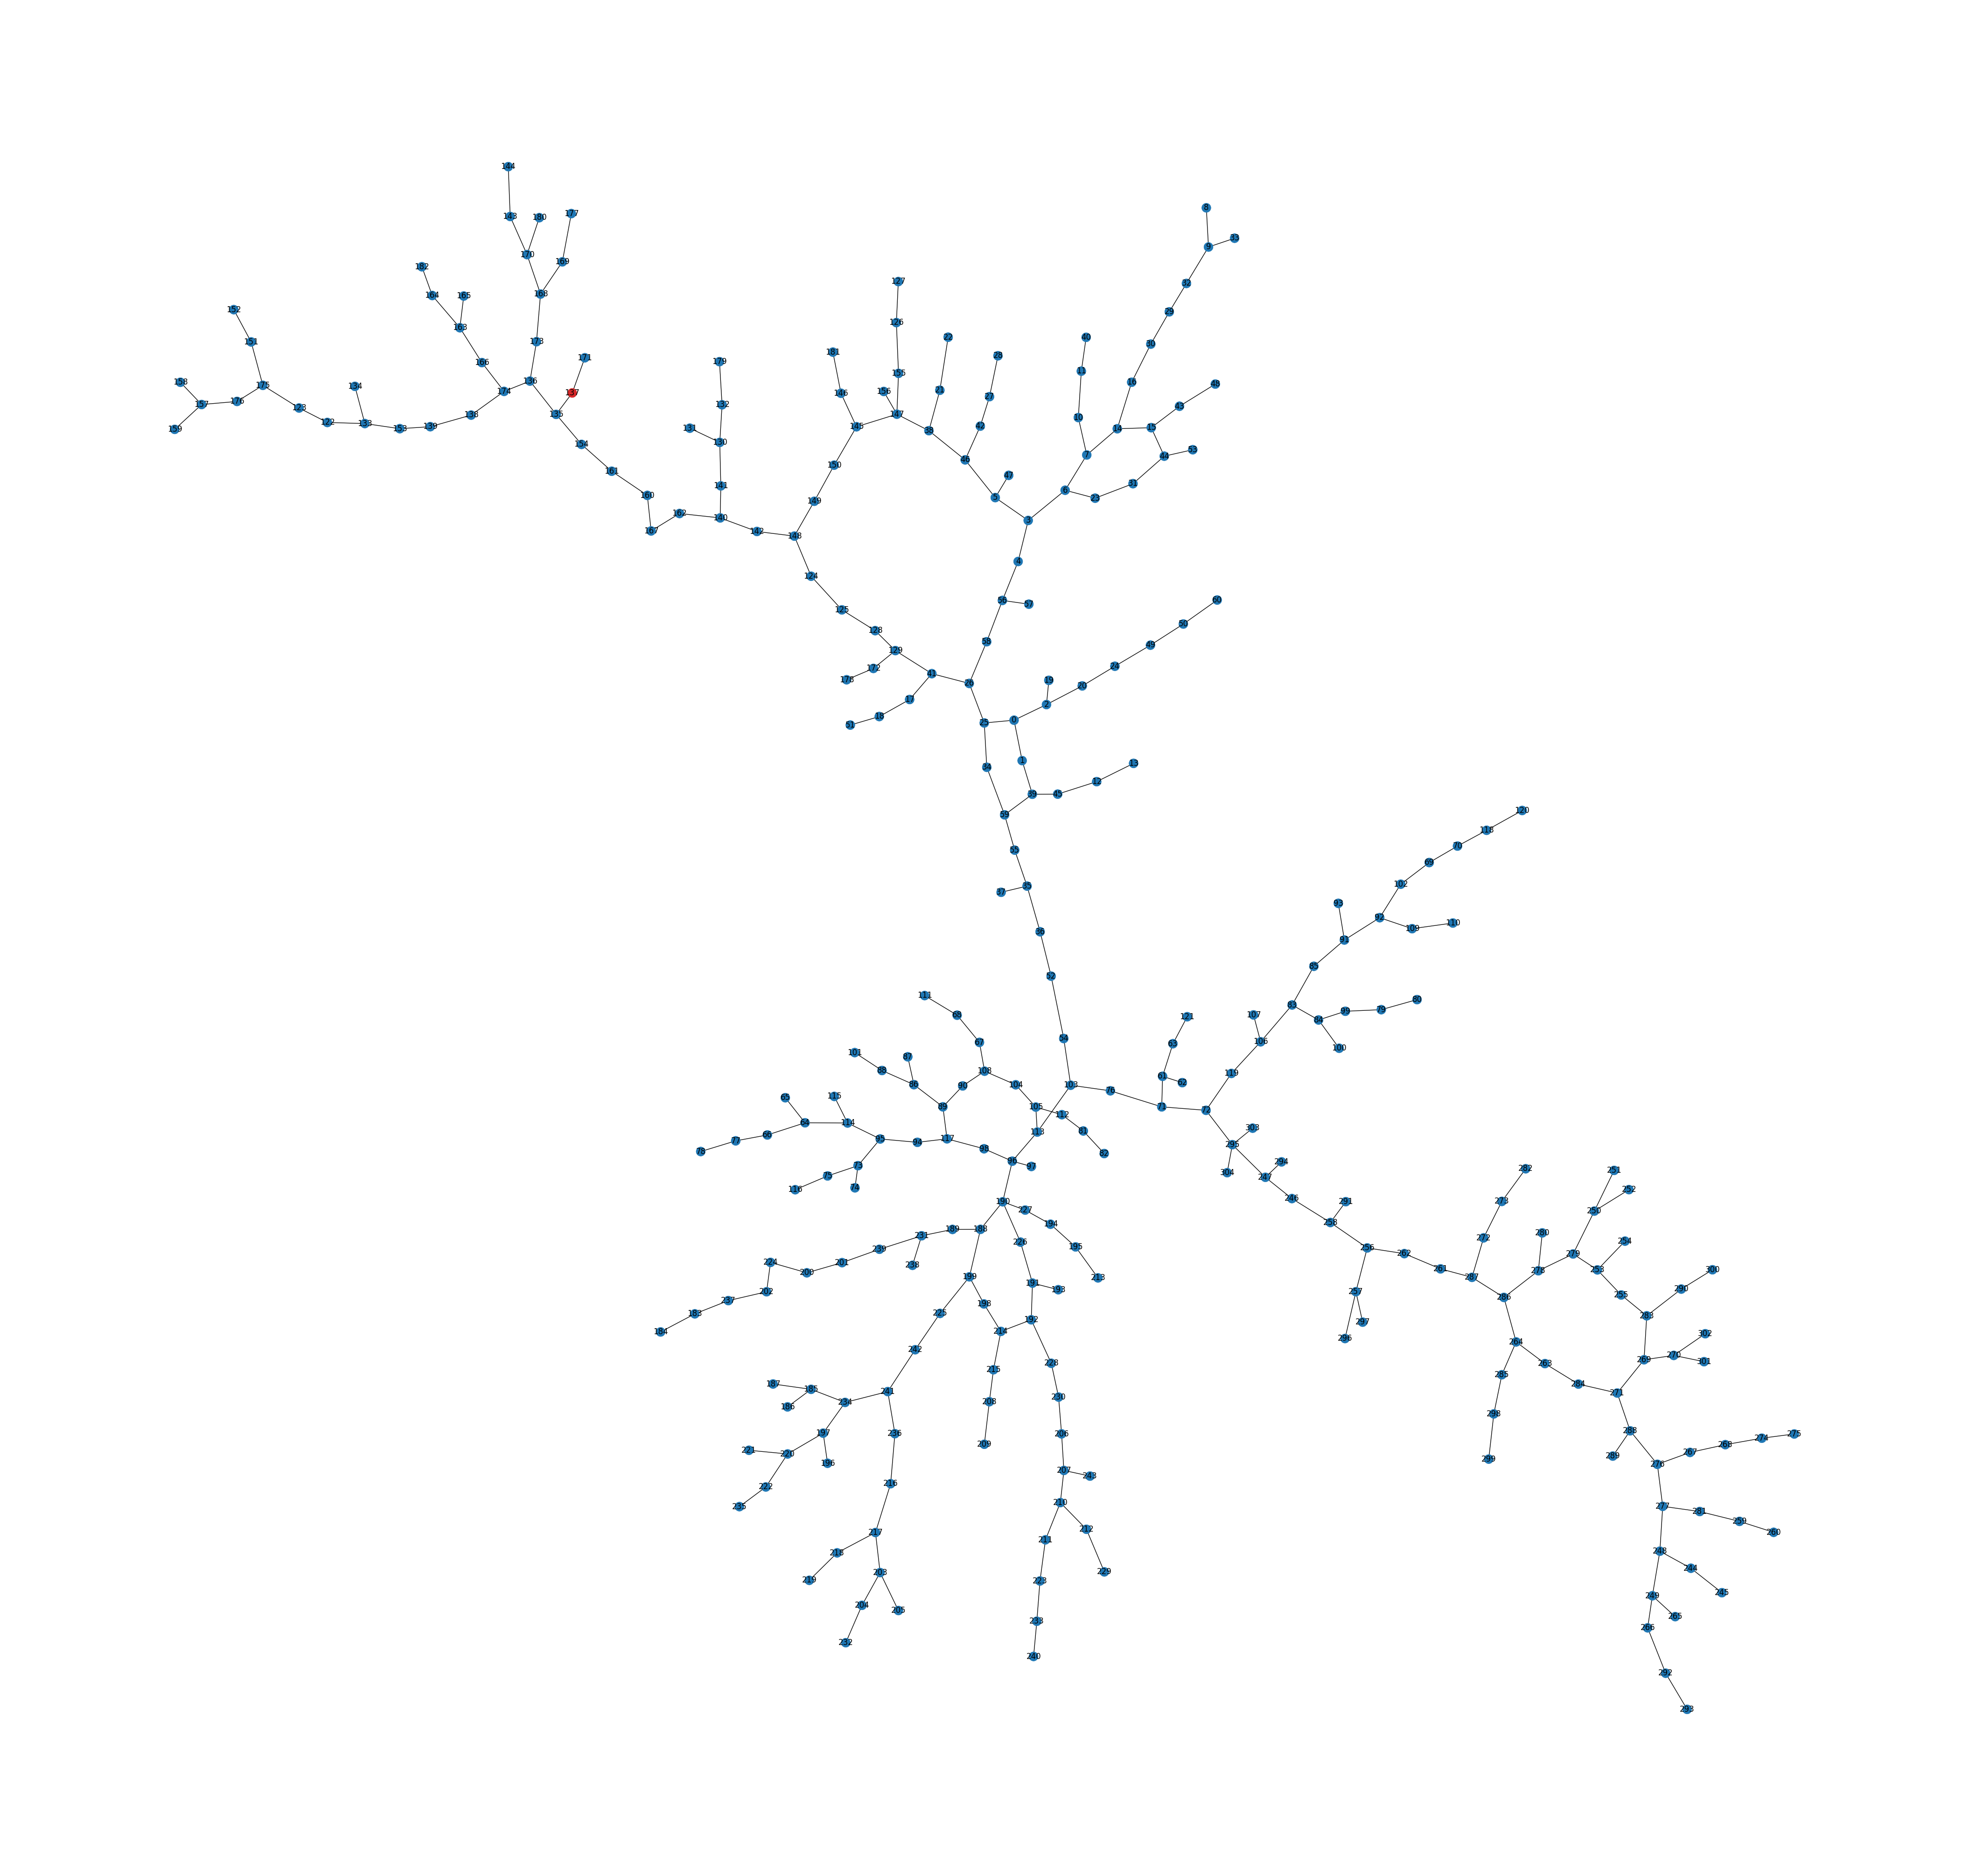

In [9]:
import random

for i in range(22,40):
    nb_regions = random.randint(2, 5) # Between 2 and 5 regions
    nb_nodes_per_region = random.randint(30, 4 1) # Between 10 to 40 nodes per region
    nb_producers_to_reach = random.randint(1, nb_regions) # Between 1 to the number of regions
    params = GraphGeneratorParameters(target_ratio=1.01, nb_regions=nb_regions, nb_nodes_per_region=nb_nodes_per_region, E_rp=0.5, E_ee=0.1, edge_weight_mean=1.0, edge_weight_std=0.1, nb_producers_to_reach=nb_producers_to_reach)
    generator = GraphDHNGenerator(params)
    generator.generate_random_connected_dhn()
    topology_dhn = DHNTopology(generator, 
                               graph_folder_name = f'synthetic_dhn_{i}',
                                heating_demand_model=2) # If 1 use heating law, 2 use DPE French data

In [6]:
nb_regions

8

In [7]:
nb_nodes_per_region

20